In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



In [110]:
df=pd.read_csv('heart.csv')

In [111]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [112]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [113]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [114]:
from sklearn.model_selection import train_test_split
x = df.drop("target", axis=1)
y = df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [116]:
#Train with linear kernel
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)


Accuracy: 0.8146341463414634
Confusion Matrix:
 [[72 30]
 [ 8 95]]


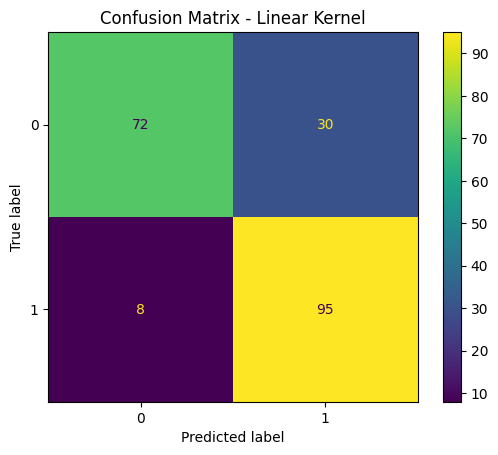

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#Accuracy score
acc = accuracy_score(y_test, y_pred_linear)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Linear Kernel")
plt.show()

In [118]:
#Poly Kernel
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly',degree=3, C=1)
svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)



Accuracy: 0.9073170731707317
Confusion Matrix:
 [[ 85  17]
 [  2 101]]


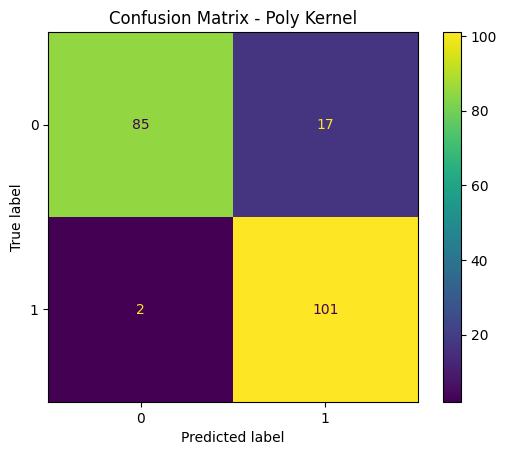

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#Accuracy score
acc1 = accuracy_score(y_test, y_pred_poly)
print("Accuracy:", acc1)

# Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred_poly)
print("Confusion Matrix:\n", cm1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.title("Confusion Matrix - Poly Kernel")
plt.show()

In [120]:
#RBF Kernel
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf',gamma='scale', C=1)
svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)



Accuracy: 0.8878048780487805
Confusion Matrix:
 [[85 17]
 [ 6 97]]


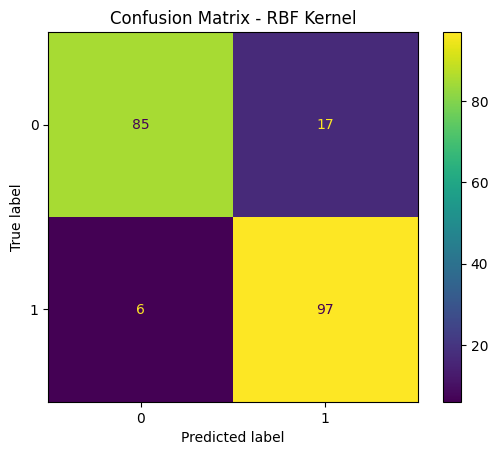

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#Accuracy score
acc2 = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", acc2)

# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix:\n", cm2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.title("Confusion Matrix - RBF Kernel")
plt.show()

***LOAN PREDICTION***

In [122]:
df1=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [123]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [124]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mean)
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].mean)
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0])
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mean)

In [126]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [127]:
X=df1.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df1.Loan_Status

In [128]:
from sklearn.preprocessing import LabelEncoder

Label_Encoders = {}

for col1 in df1.select_dtypes(include=['object']).columns:
    df1[col1] = df1[col1].astype(str)   # fix mixed datatype issue
    le1 = LabelEncoder()
    df1[col1] = le1.fit_transform(df1[col1])
    Label_Encoders[col1] = le1


In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [130]:
from sklearn.preprocessing import StandardScaler

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test  = X_test.apply(pd.to_numeric, errors='coerce')

X_train = X_train.fillna(X_train.mean())
X_test  = X_test.fillna(X_train.mean())   
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test  = scaler1.transform(X_test)


c:\Users\spand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1207: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\spand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1212: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\spand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1236: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [131]:
print("NaN in Y_train:", Y_train.isnull().sum())


NaN in Y_train: 0


In [132]:
import numpy as np

print("NaN in X_train:", np.isnan(X_train).sum())        # numpy array
print("NaN in Y_train:", Y_train.isnull().sum())         # pandas series


NaN in X_train: 2455
NaN in Y_train: 0


In [133]:
Y_train = np.array(Y_train)
Y_test  = np.array(Y_test)


In [134]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = pd.DataFrame(X)
Y = pd.Series(Y)

X = pd.get_dummies(X, drop_first=True)

le = LabelEncoder()
Y = le.fit_transform(Y.astype(str))

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_linear = SVC(kernel="linear", C=1, random_state=42)
svm_linear.fit(X_train, Y_train)

Y_pred = svm_linear.predict(X_test)

Accuracy: 0.7479674796747967
Confusion Matrix:
 [[18 25]
 [ 6 74]]


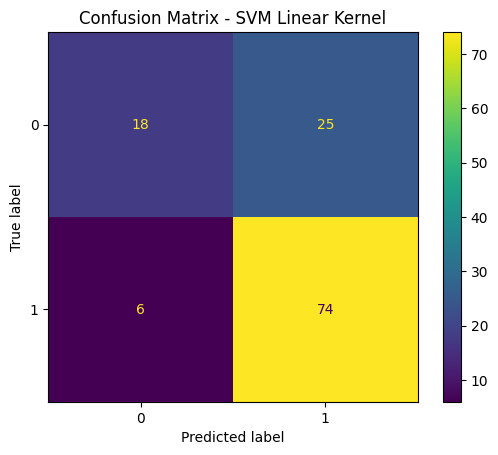

In [135]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

acc3 = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc3)

cm3 = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cm3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.title("Confusion Matrix - SVM Linear Kernel")
plt.show()


Accuracy: 0.6422764227642277
Confusion Matrix:
 [[ 2 41]
 [ 3 77]]


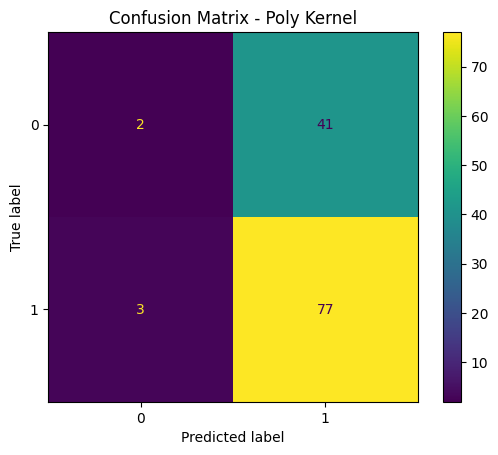

In [136]:
#Poly Kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svm_poly = SVC(kernel='poly', degree=3, C=1, random_state=42)
svm_poly.fit(X_train, Y_train)

Y_pred_poly = svm_poly.predict(X_test)

acc4 = accuracy_score(Y_test, Y_pred_poly)
print("Accuracy:", acc4)

cm4 = confusion_matrix(Y_test, Y_pred_poly)
print("Confusion Matrix:\n", cm4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()
plt.title("Confusion Matrix - Poly Kernel")
plt.show()


Accuracy: 0.7398373983739838
Confusion Matrix:
 [[15 28]
 [ 4 76]]


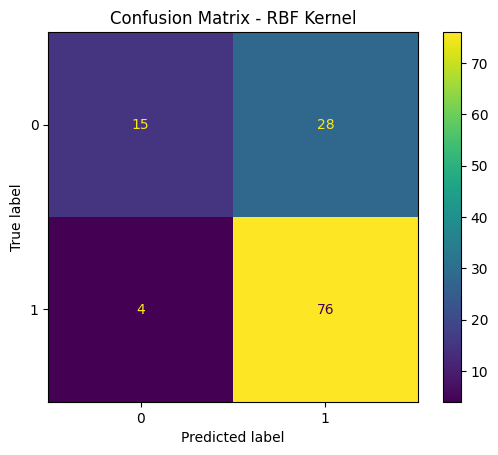

In [137]:
#RBF Kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svm_rbf = SVC(kernel='rbf', gamma='scale', C=1, random_state=42)
svm_rbf.fit(X_train, Y_train)

Y_pred_rbf = svm_rbf.predict(X_test)

acc5 = accuracy_score(Y_test, Y_pred_rbf)
print("Accuracy:", acc5)

cm5 = confusion_matrix(Y_test, Y_pred_rbf)
print("Confusion Matrix:\n", cm5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm5)
disp.plot()
plt.title("Confusion Matrix - RBF Kernel")
plt.show()


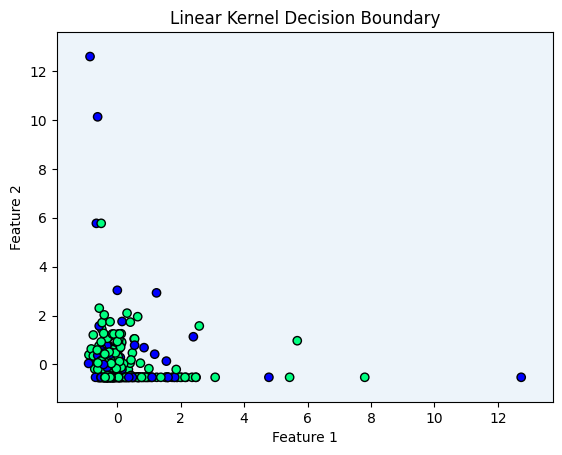

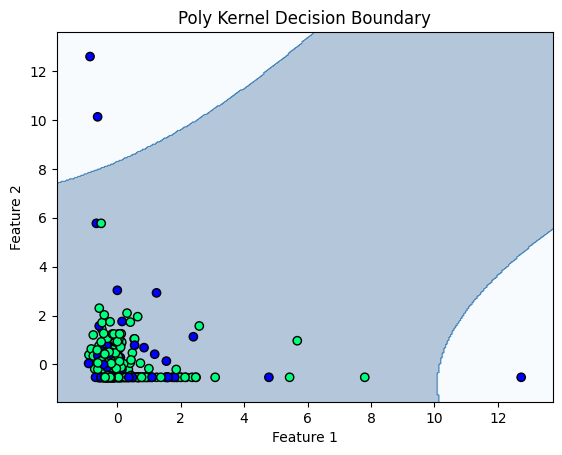

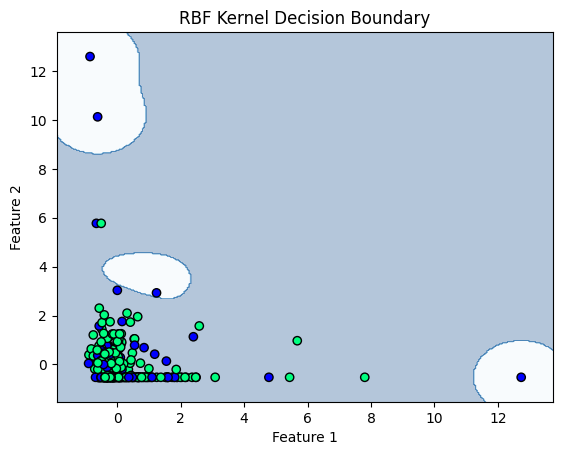

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def plot_svm_db(X_train, Y_train, model, title):
    X2 = X_train[:, :2]
    model.fit(X2, Y_train)

    x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="Blues")
    plt.scatter(X2[:, 0], X2[:, 1], c=Y_train, cmap="winter", edgecolors="k")

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_svm_db(X_train, Y_train, SVC(kernel="linear", C=1), "Linear Kernel Decision Boundary")
plot_svm_db(X_train, Y_train, SVC(kernel="poly", degree=3, C=1), "Poly Kernel Decision Boundary")
plot_svm_db(X_train, Y_train, SVC(kernel="rbf", gamma="scale", C=1), "RBF Kernel Decision Boundary")
